# US Treasury Curve Analysis

## Step 1: Import Necessary Libraries

In [69]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

## Step 2: Data Collection

In [70]:
def get_treasury_data(start_date, end_date):
    tickers = ["^IRX", "^FVX", "^TNX", "^TYX"]  # Short-term to long-term Treasury yields
    return yf.download(tickers, start=start_date, end=end_date)['Adj Close']

# Set dynamic start and end dates
end_date = datetime.today()
start_date = end_date - timedelta(days=365*5)  # Fetch data for the last 5 years
treasury_data = get_treasury_data(start_date, end_date)

[*********************100%***********************]  4 of 4 completed


## Step 3: Data Cleaning and Preprocessing

In [71]:
def clean_data(data):
    data_cleaned = data.dropna()  # Removing rows with missing values
    data_cleaned = data_cleaned.resample('M').mean()  # Resampling to monthly frequency
    return data_cleaned

treasury_data_cleaned = clean_data(treasury_data)

## Step 4: Data Analysis

In [72]:
# Step 4: Data Analysis

def calculate_metrics(data):
    # Calculate yield spread between different maturities of Treasury bonds
    data['Spread'] = data['^TYX'] - data['^IRX']  # 30-year vs. 3-month
    data['Spread_2_10'] = data['^TNX'] - data['^FVX']  # 10-year vs. 2-year
    data['Spread_10_30'] = data['^TYX'] - data['^TNX']  # 30-year vs. 10-year

    # Calculate Duration
    data['Duration'] = (data['^TYX'] - data['^FVX']) / (2 * 100)  # Simplified duration calculation

    # Calculate VaR and Expected Shortfall
    confidence_level = 0.95  # Confidence level for VaR and ES calculations
    data['VaR'] = data['^TYX'].shift(1) - data['^TYX'].shift(1).quantile(1 - confidence_level)
    data['ES'] = data['^TYX'].shift(1) - data['^TYX'].shift(1).quantile(1 - confidence_level, interpolation='lower')

calculate_metrics(treasury_data_cleaned)

## Step 5: Time Series Visualization

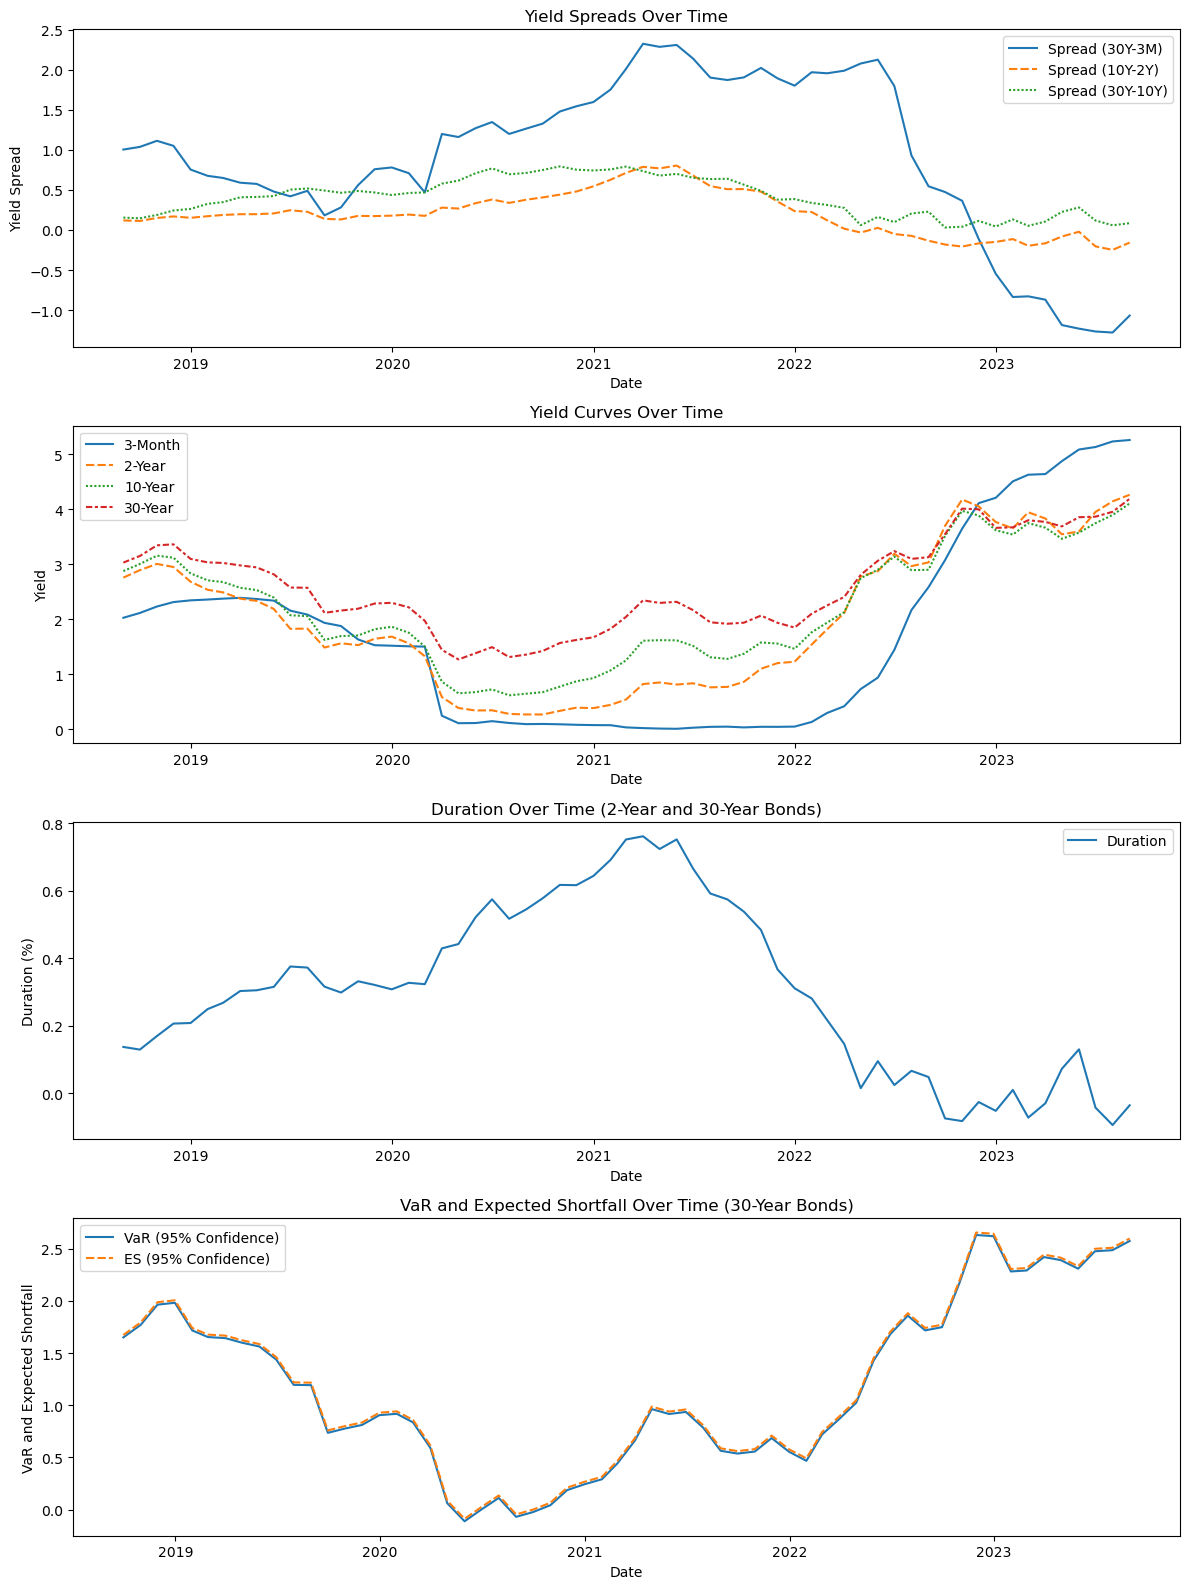

In [73]:
# Step 5: Time Series Visualization

def visualize_data(data):
    plt.figure(figsize=(12, 16))

    # Plot Yield Spreads
    plt.subplot(4, 1, 1)
    plt.title("Yield Spreads Over Time")
    sns.lineplot(data=data[['Spread', 'Spread_2_10', 'Spread_10_30']])
    plt.xlabel("Date")
    plt.ylabel("Yield Spread")
    plt.legend(['Spread (30Y-3M)', 'Spread (10Y-2Y)', 'Spread (30Y-10Y)'])

    # Plot Yield Curves
    plt.subplot(4, 1, 2)
    plt.title("Yield Curves Over Time")
    sns.lineplot(data=data[['^IRX', '^FVX', '^TNX', '^TYX']])
    plt.xlabel("Date")
    plt.ylabel("Yield")
    plt.legend(['3-Month', '2-Year', '10-Year', '30-Year'])

    # Calculate Duration as a percentage
    data['Duration_Pct'] = data['Duration'] * 100

    # Plot Duration as a percentage
    plt.subplot(4, 1, 3)
    plt.title("Duration Over Time (2-Year and 30-Year Bonds)")
    sns.lineplot(data=data['Duration_Pct'])
    plt.xlabel("Date")
    plt.ylabel("Duration (%)")
    plt.legend(['Duration'])

    # Plot VaR and Expected Shortfall for 30-year bonds
    plt.subplot(4, 1, 4)
    plt.title("VaR and Expected Shortfall Over Time (30-Year Bonds)")
    sns.lineplot(data=data[['VaR', 'ES']])
    plt.xlabel("Date")
    plt.ylabel("VaR and Expected Shortfall")
    plt.legend(['VaR (95% Confidence)', 'ES (95% Confidence)'])

    plt.tight_layout()
    plt.show()

visualize_data(treasury_data_cleaned)


## Step 6: Scenario Analysis

In [74]:
def scenario_analysis(data):
    data['Flattening_Scenario'] = data['^TYX'] - (data['^TYX'] - data['^IRX']) * 0.5
    # Additional scenarios and impact assessments can be added

scenario_analysis(treasury_data_cleaned)